Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
import pandas as pd

read traing data file

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/heartbeat_dataset/mitbih_train.csv',header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

read testing data file

In [ ]:
df_test=pd.read_csv('/content/drive/My Drive/heartbeat_dataset/mitbih_test.csv', header=None)
df_test[187].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

resample training data

In [ ]:
from sklearn.utils import resample
df_1=df_train[df_train[187]==1]
df_2=df_train[df_train[187]==2]
df_3=df_train[df_train[187]==3]
df_4=df_train[df_train[187]==4]
df_0=df_train[df_train[187]==0].sample(n=18000,random_state=42, replace=True)

df_1_upsample=resample(df_1,replace=True,n_samples=18000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=18000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=18000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=18000,random_state=126)

train_df_resample=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


In [ ]:
train_df_resample[187].value_counts()

1.0    18000
3.0    18000
4.0    18000
2.0    18000
0.0    18000
Name: 187, dtype: int64

spilt training data for x and y

In [ ]:
y=train_df_resample[187]
X=train_df_resample.drop(187, axis=1).values
X.shape

(90000, 187)

split testing data for x and y

In [ ]:
y_test=df_test[187]
X_test=df_test.drop(187, axis=1).values

In [ ]:
classes = {0:'N', 1:'S',2: 'V', 3:'F', 4:'Q'}

support vector machine model

neural network model

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=800)
mlp.fit(X, y)five
pred_mlp = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_mlp)

0.9509866617942627

In [ ]:
mlp.score(X,y)

0.9991

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     18118
         1.0       0.54      0.81      0.65       556
         2.0       0.83      0.94      0.88      1448
         3.0       0.56      0.85      0.67       162
         4.0       0.95      0.98      0.96      1608

    accuracy                           0.95     21892
   macro avg       0.77      0.91      0.83     21892
weighted avg       0.96      0.95      0.96     21892



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_mlp)

array([[17351,   362,   248,    80,    77],
       [   91,   449,    11,     4,     1],
       [   31,    16,  1368,    22,    11],
       [    8,     2,    14,   137,     1],
       [   19,     7,    11,     3,  1568]])

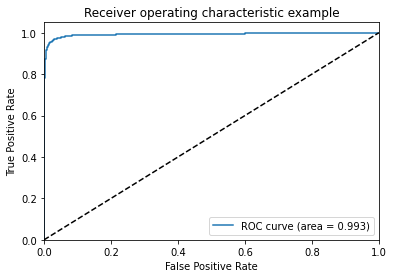

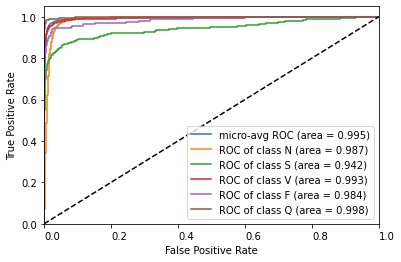

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


pred_mlp_pro = mlp.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
yt = y_test
yt = label_binarize(yt, classes=[0,1,2,3,4])
#pred_mlp_pro = label_binarize(pred_mlp, classes=[0,1,2,3,4])

n_classes=5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yt[:, i], pred_mlp_pro[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yt.ravel(), pred_mlp_pro.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.3f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-avg ROC (area = {0:0.3f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC of class {0} (area = {1:0.3f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(ha='left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('MLP_roc.pdf', format='pdf')


In [ ]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(y_test, pred_mlp_pro, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_mlp_pro, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, pred_mlp_pro, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_mlp_pro, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.983348 (macro),
0.979950 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.980924 (macro),
0.986454 (weighted by prevalence)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=900, solver='saga')
logreg.fit(X, y)
pred_logreg = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_logreg)

0.676411474511237

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_logreg, average='micro')

0.676411474511237

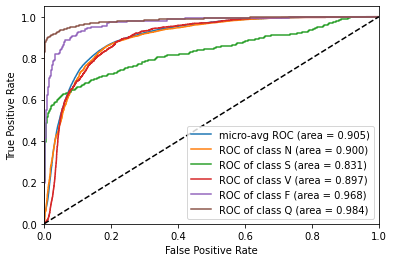

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=5
pred_logreg_pro = logreg.predict_proba(X_test)

yt = y_test
yt = label_binarize(yt, classes=[0,1,2,3,4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#pred_mlp_pro = label_binarize(pred_mlp, classes=[0,1,2,3,4])


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yt[:, i], pred_logreg_pro[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yt.ravel(), pred_logreg_pro.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-avg ROC (area = {0:0.3f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC of class {0} (area = {1:0.3f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('LR_roc.pdf', format='pdf')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.97      0.65      0.78     18118
         1.0       0.15      0.67      0.24       556
         2.0       0.29      0.72      0.42      1448
         3.0       0.08      0.88      0.15       162
         4.0       0.74      0.91      0.82      1608

    accuracy                           0.68     21892
   macro avg       0.45      0.76      0.48     21892
weighted avg       0.88      0.68      0.74     21892



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_logreg)

array([[11790,  2085,  2369,  1415,   459],
       [  125,   370,    31,    20,    10],
       [  158,    53,  1038,   153,    46],
       [   11,     0,     9,   142,     0],
       [   49,     5,    73,    13,  1468]])

In [ ]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(y_test, pred_logreg_pro, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_logreg_pro, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, pred_logreg_pro, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_logreg_pro, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.939251 (macro),
0.907547 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.916049 (macro),
0.905017 (weighted by prevalence)


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X, y)
pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.7568061392289421

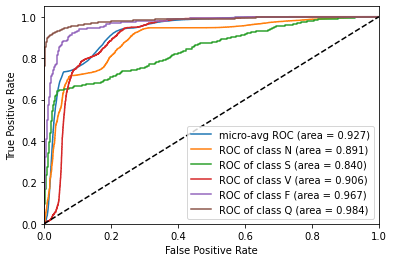

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


pred_clf_pro = clf.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#pred_mlp_pro = label_binarize(pred_mlp, classes=[0,1,2,3,4])


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yt[:, i], pred_clf_pro[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yt.ravel(), pred_clf_pro.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-avg ROC (area = {0:0.3f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC of class {0} (area = {1:0.3f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('SVC_roc.pdf', format='pdf')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     18118
         1.0       0.28      0.65      0.39       556
         2.0       0.33      0.79      0.47      1448
         3.0       0.10      0.88      0.17       162
         4.0       0.80      0.91      0.85      1608

    accuracy                           0.76     21892
   macro avg       0.50      0.79      0.55     21892
weighted avg       0.89      0.76      0.80     21892



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[13456,   869,  2241,  1207,   345],
       [  142,   360,    28,    24,     2],
       [  150,    32,  1147,    99,    20],
       [   11,     0,     8,   143,     0],
       [   69,     6,    57,    14,  1462]])